<a href="https://colab.research.google.com/github/JS1988-msemdanccm/team_02/blob/main/Obtain_Insurance_Language_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBTAIN INSURANCE STATUS

In [91]:
#Import libraries and packages
%pip install tableone
import pandas as pd
import seaborn as sns

In [3]:
#Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Connect big query
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

%load_ext google.colab.data_table

Authenticated


In [12]:
# change this to change the right project
%env GOOGLE_CLOUD_PROJECT = sccm-datathon-2023-participant

env: GOOGLE_CLOUD_PROJECT=sccm-datathon-2023-participant


In [5]:
#Load dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of pulseox_dataset.csv')

<ipython-input-5-a3bb1a954afb>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Copy of pulseox_dataset.csv')


In [6]:
#Inspect dataset
df.head()

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0


In [10]:
#Generate columns list
df.columns.tolist()

['unique_subject_id',
 'unique_hospital_admission_id',
 'unique_icustay_id',
 'subject_id',
 'hospital_admission_id',
 'icustay_id',
 'source_db',
 'hospitalid',
 'numbedscategory',
 'teachingstatus',
 'region',
 'admission_age',
 'sex_female',
 'weight_admission',
 'height_admission',
 'BMI_admission',
 'datetime_hospital_admit',
 'datetime_hospital_discharge',
 'datetime_icu_admit',
 'datetime_icu_discharge',
 'los_hospital',
 'los_ICU',
 'comorbidity_score_name',
 'comorbidity_score_value',
 'in_hospital_mortality',
 'race_ethnicity',
 'SaO2_timestamp',
 'pH',
 'pCO2',
 'pO2',
 'SaO2',
 'SpO2',
 'Carboxyhemoglobin',
 'Methemoglobin',
 'SpO2_timestamp',
 'delta_SpO2',
 'delta_vitals_heart_rate',
 'vitals_heart_rate',
 'delta_vitals_resp_rate',
 'vitals_resp_rate',
 'delta_vitals_mbp_ni',
 'vitals_mbp_ni',
 'delta_vitals_sbp_ni',
 'vitals_sbp_ni',
 'delta_vitals_dbp_ni',
 'vitals_dbp_ni',
 'delta_vitals_mbp_i',
 'vitals_mbp_i',
 'delta_vitals_sbp_i',
 'vitals_sbp_i',
 'delta_vitals_db

In [7]:
df.dtypes

unique_subject_id                    int64
unique_hospital_admission_id         int64
unique_icustay_id                    int64
subject_id                          object
hospital_admission_id                int64
                                    ...   
sofa_future_cardiovascular_24hr    float64
delta_sofa_future_cns_24hr         float64
sofa_future_cns_24hr               float64
delta_sofa_future_renal_24hr       float64
sofa_future_renal_24hr             float64
Length: 142, dtype: object

In [72]:
df['source_db'].unique()

array(['eicu', 'mimic_iii', 'mimic_iv'], dtype=object)

In [73]:
#Subdivide dataframes to append relevant data
df_eicu=df[df['source_db']=='eicu']
df_mimic_iii=df[df['source_db']=='mimic_iii']
df_mimic_iv=df[df['source_db']=='mimic_iv']

In [74]:
#Identify format of subject_id
df_mimic_iii['subject_id'].dtype

dtype('O')

In [75]:
#Convert object data type on subject id to numeric
df_mimic_iii['subject_id']=pd.to_numeric(df_mimic_iii['subject_id'])

<ipython-input-75-60bdefa011d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mimic_iii['subject_id']=pd.to_numeric(df_mimic_iii['subject_id'])


In [76]:
#Confirm that data type is now an integer
df_mimic_iii['subject_id'].dtype

dtype('int64')

In [49]:
#CODE JUNKYARD:
#df['subject_id'].astype(str).str.replace('-','').astype(int)
#df['subject_id'] = df['subject_id'].astype(str).str.replace('-','').astype(int)

In [77]:
%%bigquery df_adm --project sccm-datathon-2023-participant

    SELECT SUBJECT_ID, INSURANCE, LANGUAGE, RELIGION, MARITAL_STATUS, ETHNICITY
    FROM `physionet-data.mimiciii_clinical.admissions`


Query is running:   0%|          |

Downloading:   0%|          |

In [78]:
#Inspect initial rows
df_adm.head()

,SUBJECT_ID,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY
0,3115,Medicare,None,None,None,WHITE
1,7124,Medicare,None,None,None,WHITE
2,10348,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED
3,9396,Medicare,None,None,None,WHITE
4,9333,Private,None,None,None,UNKNOWN/NOT SPECIFIED


In [86]:
#Merge mimic_iii sub-table on demographics columns from MIMIC III ADMISSIONS table
df_merged_iii=pd.merge(df_mimic_iii,df_adm, how='left',left_on='subject_id', right_on='SUBJECT_ID')

In [94]:
#Inspect merged data set
df_merged_iii[['subject_id','pH','pCO2','pO2','SaO2','SpO2','vitals_tempc','race_ethnicity','SUBJECT_ID','INSURANCE','LANGUAGE','RELIGION','MARITAL_STATUS','ETHNICITY']]

,subject_id,pH,pCO2,pO2,SaO2,SpO2,vitals_tempc,race_ethnicity,SUBJECT_ID,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY
0,11957,7.37,38.0,118.0,97.0,98,37.200000,White,11957,Medicare,ENGL,CATHOLIC,MARRIED,WHITE
1,11957,7.37,38.0,118.0,97.0,98,37.200000,White,11957,Medicare,ENGL,CATHOLIC,MARRIED,WHITE
2,11957,7.37,38.0,118.0,97.0,98,37.200000,White,11957,Medicare,ENGL,CATHOLIC,MARRIED,WHITE
3,11957,7.37,38.0,118.0,97.0,98,37.200000,White,11957,Medicare,ENGL,CATHOLIC,MARRIED,WHITE
4,11957,7.37,38.0,118.0,97.0,98,37.200000,White,11957,Medicare,ENGL,CATHOLIC,MARRIED,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,99650,7.27,47.0,113.0,97.0,99,37.555556,White,99650,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE
1216,99817,7.34,32.0,336.0,99.0,75,38.166667,Unknown,99817,Medicare,ENGL,PROTESTANT QUAKER,SINGLE,UNKNOWN/NOT SPECIFIED
1217,99883,7.33,43.0,100.0,97.0,99,35.900000,White,99883,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE
1218,99883,7.33,43.0,100.0,97.0,99,35.900000,White,99883,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE


<Axes: xlabel='pO2', ylabel='SpO2'>

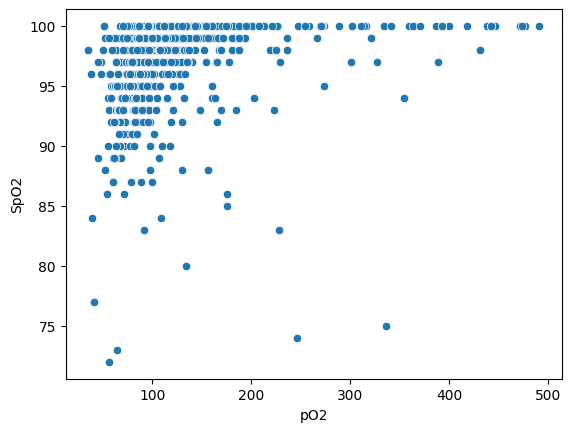

In [99]:
#Basic Scatter Plot of All the Data
sns.scatterplot(df_merged_iii,x='pO2',y='SpO2')

<Axes: xlabel='pO2', ylabel='SpO2'>

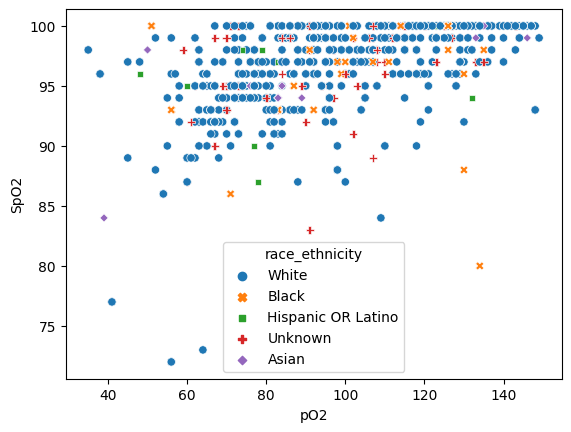

In [98]:
#Add race_ethnicity hue/style
sns.scatterplot(df_merged_iii[df_merged_iii['pO2']<150],x='pO2',y='SpO2',hue='race_ethnicity',style='race_ethnicity')

<Axes: xlabel='pO2', ylabel='SpO2'>

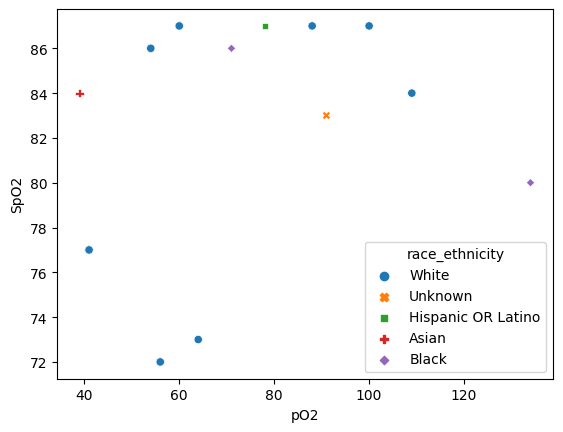

In [100]:
#Look at subgroup of low oxygenation individuals
sns.scatterplot(df_merged_iii[(df_merged_iii['pO2']<150)&(df_merged_iii['SpO2']<88)],x='pO2',y='SpO2',hue='race_ethnicity',style='race_ethnicity')

In [109]:
#Inspect some data from these individuals
df_merged_iii[['subject_id','pO2','SpO2']].loc[(df_merged_iii['SpO2']<90)&(df_merged_iii['pO2']<80)]

,subject_id,pO2,SpO2
14,16053,41.0,77
15,16053,41.0,77
16,16053,41.0,77
17,16053,41.0,77
18,16053,41.0,77
19,16053,41.0,77
20,16053,41.0,77
21,16053,41.0,77
22,16053,41.0,77
23,16053,41.0,77
